# Comparison between the enrichment scores and experimental evaluation of individual variants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import scipy

plt.style.use('/work/projects/project01640/jm/domain_insertion/dipSeq/batch_scripts_JMA/scripts_paper/utils/domain_ins.mplstyle')
plt.rcParams['svg.fonttype'] = 'none'

### Import data

In [2]:
base = '/work/projects/project01640/jm/domain_insertion/DI_screen'
fig_folder = f'{base}/analysis/figures'
data = pd.read_csv(f'{base}/experimental_rawdata/Wetlab_validation_switches.csv', delimiter=';')
del data['Unnamed: 3']

In [3]:
data[['protein', 'position', 'insert']] = data['name'].str.split('_', expand=True)
data['state'] = np.where(data['enrichment'] > 0, 1, 0)
data.dropna(inplace=True)
data

,name,fluorescence,enrichment,protein,position,insert,state
0,AraC_E3_PDZ,45670.188740,2.193843,AraC,E3,PDZ,1
1,AraC_N16_PDZ,1247.577193,-4.411219,AraC,N16,PDZ,0
2,AraC_L23_PDZ,44.311083,-6.962230,AraC,L23,PDZ,0
3,AraC_T50_PDZ,41.162518,-10.000000,AraC,T50,PDZ,0
4,AraC_Q60_PDZ,26447.334250,2.204967,AraC,Q60,PDZ,1
...,...,...,...,...,...,...,...
111,TVMV_D11_LOV,3579.017001,3.583506,TVMV,D11,LOV,1
112,TVMV_S121_LOV,2353.099454,-1.204114,TVMV,S121,LOV,0
113,TVMV_F204_LOV,1306.033799,-1.024143,TVMV,F204,LOV,0
114,TVMV_G37_LOV,1270.438706,-1.710079,TVMV,G37,LOV,0


0.00637730142168832
3.073355530241744e-05
0.044444444444444446
0.2
0.006993006993006993
0.2


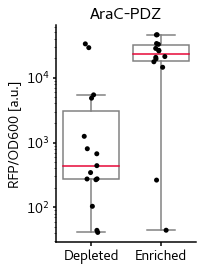

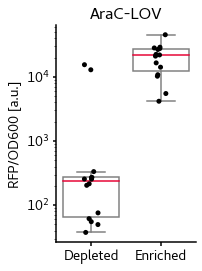

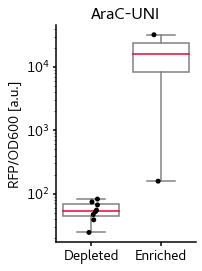

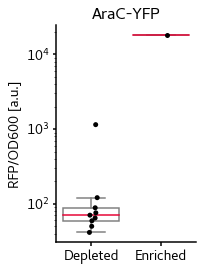

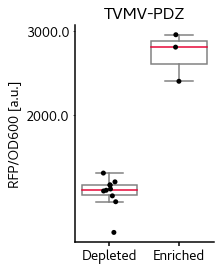

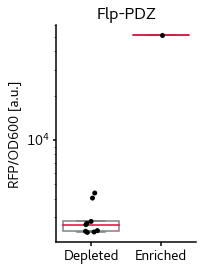

In [5]:
datasets = [['AraC', 'PDZ'], ['AraC', 'LOV'], ['AraC', 'ERD'], ['AraC', 'UNI'], ['AraC', 'YFP'], ['TVMV', 'PDZ'], ['Flp', 'PDZ']]

for combi in datasets:
    try:
        current_data = data[(data['protein'] == combi[0]) & (data['insert'] == combi[1])]
        s, pvalue = scipy.stats.mannwhitneyu(current_data[current_data["state"] == 0]['fluorescence'], current_data[current_data["state"] == 1]['fluorescence'])
        print(pvalue)
        plt.figure(figsize=(2.5,4))
        ax = sns.boxplot(data=current_data, x='state', y='fluorescence', fliersize=0, linewidth=1.5, whiskerprops={'color':'grey'}, 
        capprops={'color':'grey'}, boxprops={'color':'white', 'linewidth':1.5, 'edgecolor':'grey'}, medianprops={'color':'#E60234'})
        ax = sns.stripplot(data=current_data, x='state', y='fluorescence', alpha=1, linewidth=0, color='black')
        sns.despine()
        ax.set_yscale('log')
        plt.title(f'{combi[0]}-{combi[1]}')
        plt.ylabel('RFP/OD600 [a.u.]')
        plt.xticks([0,1], ['Depleted', 'Enriched'])
        if combi[0] == 'TVMV':
            ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
        plt.xlabel("")
        plt.savefig(f"{fig_folder}/{combi[0]}{combi[1]}_wetlab.svg")

    except:
        pass